# Dask 

An open-source software tool with the intended purpose: 

* *to scale computational libraries like Numpy, Pandas, and Scikit-Learn* 
* *to scale to multi-core machines and distributed clusters within Python ecosystem*


### The uses of Dask generally fall into two categories:
    1. Analysis of large datasets with common/familiar libraries (similar to Spark)
    
    2. Custom task scheduling (parallelization of custom workflows)

## Analysis of Large Dataset
### Dask can accelerate existing Python ecosystem

### For comparison of the existing system and Dask we will be utilizing the libraries `Numpy`

This comparison can also be done using the  `Pandas`, and `Scikit-Learn` libraries. 

In [1]:
import numpy as np
import dask
# Dask equivalent
import dask.array as da

Not originally designed to scale or beyond a single cpu or for data that doesn't fit memory. This often causes memory errors, or the need for switching library

In [2]:
# Numpy
x = np.ones((10, 5,5))
x

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]

In [3]:
# Creates memory error because there isn't enough RAM available for it to store this data in memory
x = np.ones((1000000, 1000000,1000000))
x

MemoryError: Unable to allocate 6.94 EiB for an array with shape (1000000, 1000000, 1000000) and data type float64

Here we create a 3D array of the same dimensions we saw previously.

And the output shows the properties of the overall array, along with the properties of the chucks the array has been divided into. 

PiB = $1024^5$

MiB = $1024^2$

In [4]:
# this is where dask comes in 
x = da.ones((1000000, 1000000,1000000))
x

,Array,Chunk
Bytes,7105.43 PiB,119.21 MiB
Shape,"(1000000, 1000000, 1000000)","(250, 250, 250)"
Count,64000000000 Tasks,64000000000 Chunks
Type,float64,numpy.ndarray


We can look at different shapes of arrays, and test the data quantity to fulfill the quanity requirements of to create uniform chunks

In [5]:
# this is where dask comes in 
# (100,100) one chunk
x = da.ones((5000,5000))
x

dask.array<ones, shape=(5000, 5000), dtype=float64, chunksize=(2500, 2500), chunktype=numpy.ndarray>

We can also specify a `chunk` argument for breaking up the array into chunks. 

In [6]:
da.from_array(np.random.randn(100), chunks=20)

dask.array<array, shape=(100,), dtype=float64, chunksize=(20,), chunktype=numpy.ndarray>

Or we can rechunk the already created array.

In [7]:
x.rechunk(20)

dask.array<rechunk-merge, shape=(5000, 5000), dtype=float64, chunksize=(20, 20), chunktype=numpy.ndarray>

We are still implementing the `Numpy` library but by-passing the memory issue by cutting up large arrays into chunks and distributing them across multiple machines. OR it can leverage a single machines multi-core CPU to utilize parallel computations, similar to the [Apache Spark Example](https://github.com/EQWorks/python-curriculum/blob/14/data-analysis/14-distributed-computation/notebook.ipynb) previously seen. 

**In this next section we will see a simple implementation of parallel processing utilizing dask**
We will be lookign at parallel processing in two different ways:
 - applying a single function to many pieces of data
 - parallelizing the use of different functions

First we need to set-up a distributed scheduler, this is similar to creating a cluster. For this example we will be connecting to the local cluster by using `Client`.

When creating the local Cluster, [parameters](https://docs.dask.org/en/latest/setup/single-distributed.html) can be specified to establish the scheduler and workers to be run on machine.

In [8]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 4,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:51976,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:51979,Total threads: 4
Dashboard: http://127.0.0.1:51980/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:51978,


For comparison purposes we will execute utilizing the `pandas` library actions. 

In [9]:
import time
import random
import pandas as pd

# Create a simple function that find average of list
def average(l):
    # to simulate "real work" being done
    time.sleep(random.random())
    return sum(l)/len(l)

In [10]:
%time 
average([5,14,15,15])
# Shows the time taken to produce a single result

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


12.25

In [11]:
# Create a dataframe with random data
df = pd.DataFrame(np.random.random(size=(100, 4)),
                            columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.815824,0.924416,0.071154,0.060372
1,0.034978,0.875388,0.945118,0.815548
2,0.062447,0.608936,0.712515,0.415868
3,0.235510,0.221383,0.175007,0.949685
4,0.352551,0.505983,0.332734,0.190880
...,...,...,...,...
95,0.759296,0.091844,0.263487,0.900420
96,0.655725,0.378116,0.289811,0.065322
97,0.207016,0.375131,0.081022,0.963748
98,0.187847,0.656797,0.030821,0.638107


In [12]:
results = []

In [13]:
# Will only use sample of data created
%time
for p in df.values[:10]:
    result = average(p)
    results.append(result)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [14]:
%time
results

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


[0.4679416566534351,
 0.6677579775794646,
 0.4499416410154088,
 0.3953962980541851,
 0.3455369992191627,
 0.48528908939045695,
 0.41820234506901177,
 0.43628597238211775,
 0.5818733737304974,
 0.8399306880697432]

In [15]:
dask_results = []

In [16]:
# Utilizing dask, compare samples by time taken
%time
for p in df.values[:10]:
    lazy = dask.delayed(average)(p)
    # Has not been run yet, this simply stores the information for calls made
    dask_results.append(lazy)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [17]:
# We will re-run for all 100 rows
for p in df.values[:10]:
    lazy = dask.delayed(average)(p)
    dask_results.append(lazy)
    
f = dask.persist(*dask_results)  
# triggers computation in the background

In [18]:
%time
dask.compute(*f)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


(0.4679416566534351,
 0.6677579775794646,
 0.4499416410154088,
 0.3953962980541851,
 0.3455369992191627,
 0.48528908939045695,
 0.41820234506901177,
 0.43628597238211775,
 0.5818733737304974,
 0.8399306880697432,
 0.4679416566534351,
 0.6677579775794646,
 0.4499416410154088,
 0.3953962980541851,
 0.3455369992191627,
 0.48528908939045695,
 0.41820234506901177,
 0.43628597238211775,
 0.5818733737304974,
 0.8399306880697432)

In [19]:
# specifying the usage of ten 4-thread workers
client.cluster.scale(10) 

In [22]:
%time
dask.compute(*dask_results)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


(0.4679416566534351,
 0.6677579775794646,
 0.4499416410154088,
 0.3953962980541851,
 0.3455369992191627,
 0.48528908939045695,
 0.41820234506901177,
 0.43628597238211775,
 0.5818733737304974,
 0.8399306880697432,
 0.4679416566534351,
 0.6677579775794646,
 0.4499416410154088,
 0.3953962980541851,
 0.3455369992191627,
 0.48528908939045695,
 0.41820234506901177,
 0.43628597238211775,
 0.5818733737304974,
 0.8399306880697432)

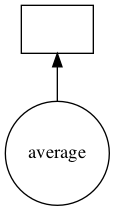

In [23]:
lazy.visualize()

Similar to spark, where the process is being stored, and is executed when called using `.compute()`

**We will now look at how `dask.delayed` simplifies the parallelized usage of several custom functions.**

In [24]:
def one(x):
    return x + 1

def combine(x, y):
    return x + y

def half(x):
    return x/2


In [25]:
x = dask.delayed(one)(15)
y = dask.delayed(one)(30)
x2 = dask.delayed(half)(x)
y2 = dask.delayed(half)(y)
total = dask.delayed(combine)(x, y)

total.compute()

47

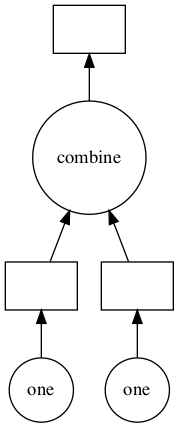

In [26]:
total.visualize()

A visual to demonstrate how this would work with more functions and a heavier processing need. 

Each step is independently executed and can be run as long as dependents are executed first. 

![dask](https://tutorial.dask.org/_images/grid_search_schedule.gif)